This project is really just me self studying. 

In [1]:
#pandas and NumPy imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use(['dark_background'])
%matplotlib inline

In [3]:
import os #for files read/write
from datetime import datetime # For time stamps
import yfinance as yf #fetching the data stock
from __future__ import division# For division in Python 3

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Extraction, Transformation and Loading

# Define the list of stock tickers and their corresponding company names
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_names = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

# Set the date range (last year to today)
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Loop to download stock data for each ticker and create a DataFrame for each
for stock, company_name in zip(tech_list, company_names):
    stock_data = yf.download(stock, start, end) # Download the stock data
    stock_data['company_name'] = company_name # Add the 'company_name' column
    stock_data.columns = [col[0] if isinstance(col, tuple) else col for col in stock_data.columns] #drops the 2nd level in column names
    globals()[stock] = stock_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
#Data Preparation and Val
AAPL.info()
GOOG.info()
MSFT.info()
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-01-30 to 2025-01-29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Open          251 non-null    float64
 4   Volume        251 non-null    int64  
 5   company_name  251 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-01-30 to 2025-01-29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Open          251 non-null    float64
 4   Volume        251 non-null    int64  
 5   company_name  251 non-null    object 
dty

In [6]:
AAPL.isna().sum()
GOOG.isna().sum()
MSFT.isna().sum()
AMZN.isna().sum()

Close           0
High            0
Low             0
Open            0
Volume          0
company_name    0
dtype: int64

In [7]:
AAPL.tail()

,Close,High,Low,Open,Volume,company_name
Date,,,,,,
2025-01-23,223.660004,227.029999,222.300003,224.740005,60234800,APPLE
2025-01-24,222.779999,225.630005,221.410004,224.779999,54697900,APPLE
2025-01-27,229.860001,232.149994,223.979996,224.020004,94863400,APPLE
2025-01-28,238.259995,240.190002,230.809998,230.850006,75707600,APPLE
2025-01-29,239.360001,239.860001,234.009995,234.119995,45375500,APPLE


In [8]:
df = pd.concat([AAPL, GOOG, MSFT, AMZN]) #combining into 1 data frame

In [9]:
df.describe()

,Close,High,Low,Open,Volume
count,1004.000000,1004.000000,1004.000000,1004.000000,1.004000e+03
mean,247.757034,249.968354,245.364691,247.712597,3.429337e+07
std,103.610854,104.288072,102.806677,103.654166,2.413850e+07
min,132.085388,133.540187,131.079029,132.264771,6.809800e+06
25%,175.433891,177.498972,173.789607,175.406339,1.783135e+07
50%,193.935982,196.662498,192.459999,194.357506,2.850340e+07
75%,291.053703,294.488971,289.251850,290.565951,4.324608e+07
max,465.786438,466.573450,462.698189,465.228569,3.186799e+08


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2024-01-30 to 2025-01-29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         1004 non-null   float64
 1   High          1004 non-null   float64
 2   Low           1004 non-null   float64
 3   Open          1004 non-null   float64
 4   Volume        1004 non-null   int64  
 5   company_name  1004 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 54.9+ KB


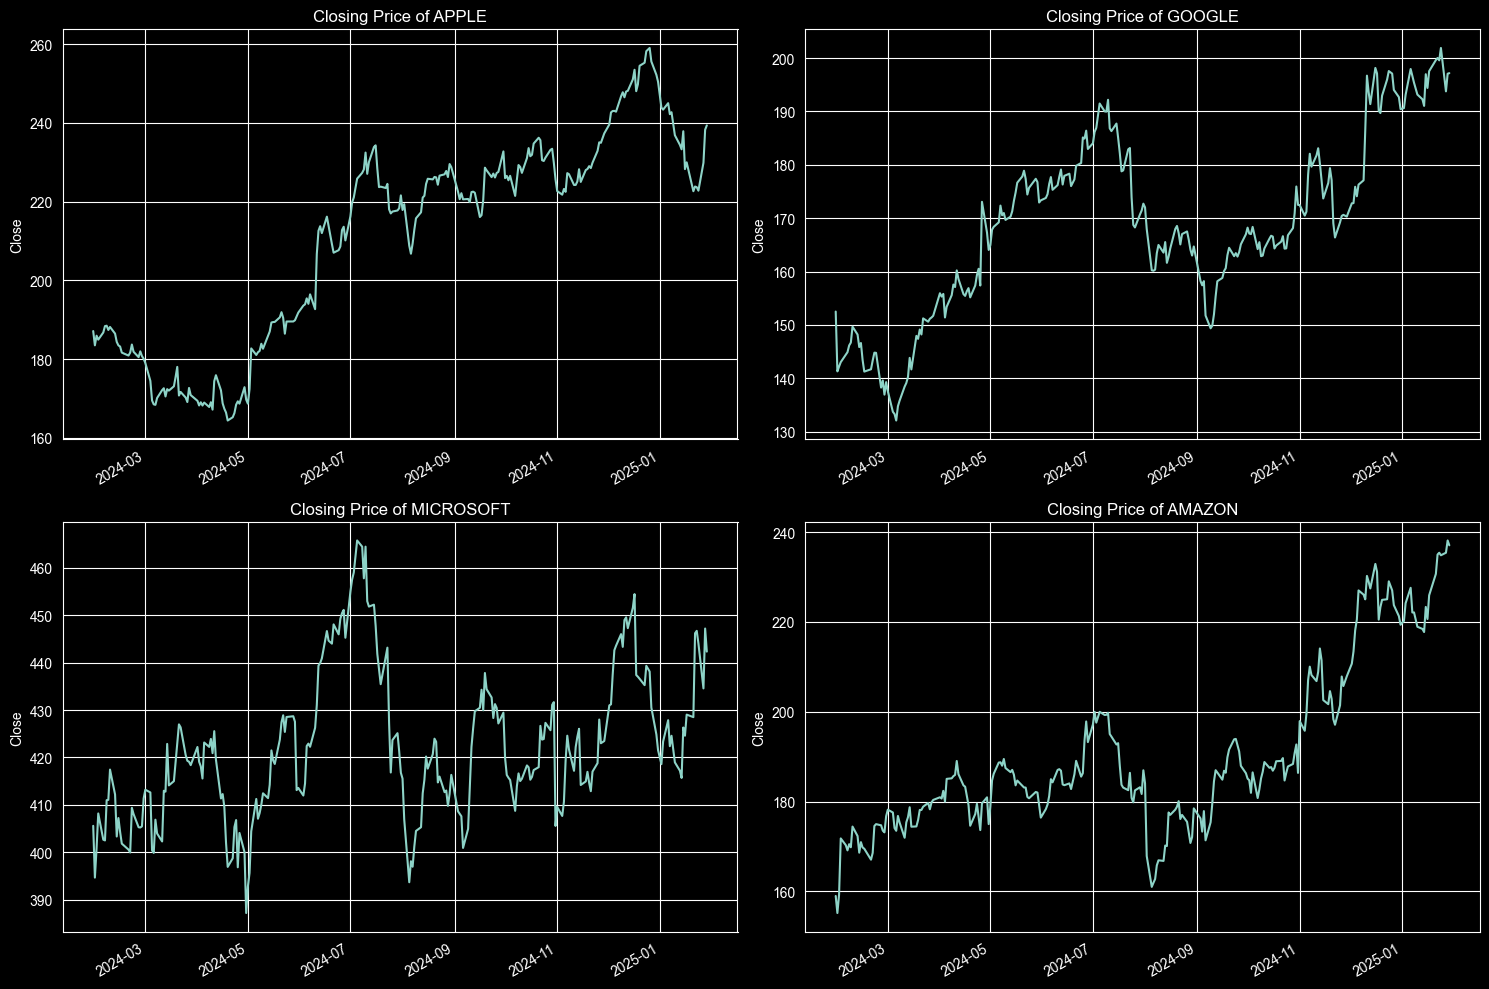

In [22]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Assuming company_names contains 4 company names
for i, company in enumerate(company_names, 1):
    plt.subplot(2, 2, i)  # 2x2 grid for 4 companies
    df[df['company_name'] == company]['Close'].plot()  # Filter data for each company
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company}")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [39]:
df = df.reset_index()

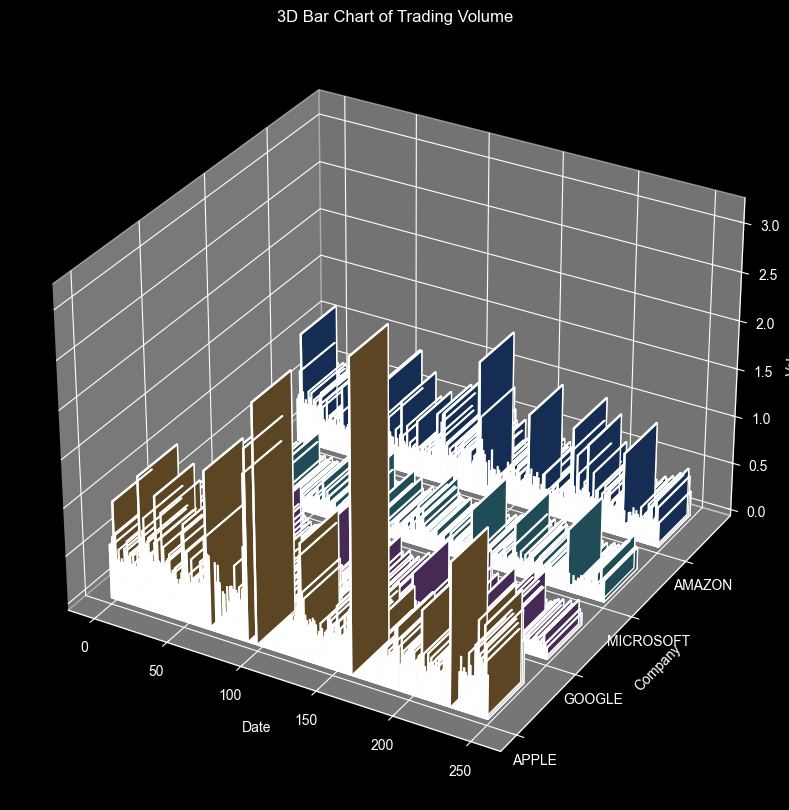

In [51]:
from mpl_toolkits.mplot3d import Axes3D

# Create figure
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Define bar width
bar_width = 0.6  

# Unique companies
companies = df['company_name'].unique()

# Loop through each company to plot bars
for i, company in enumerate(companies):
    # Filter data for the current company
    company_data = df[df['company_name'] == company]

    # X-axis: Convert dates into numeric values
    dates = np.arange(len(company_data))

    # Y-axis: Company index (shifted to prevent overlap)
    y = np.full_like(dates, i)  

    # Z-axis: Volume data
    volume = company_data['Volume']

    # Plot 3D bar graph
    ax.bar3d(dates, y, np.zeros_like(volume), dx=bar_width, dy=bar_width, dz=volume, color=np.random.rand(3,))

# Labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Company")
ax.set_zlabel("Volume")
ax.set_title("3D Bar Chart of Trading Volume")

# Set Y-axis labels to company names
ax.set_yticks(np.arange(len(companies)))
ax.set_yticklabels(companies)

plt.show()

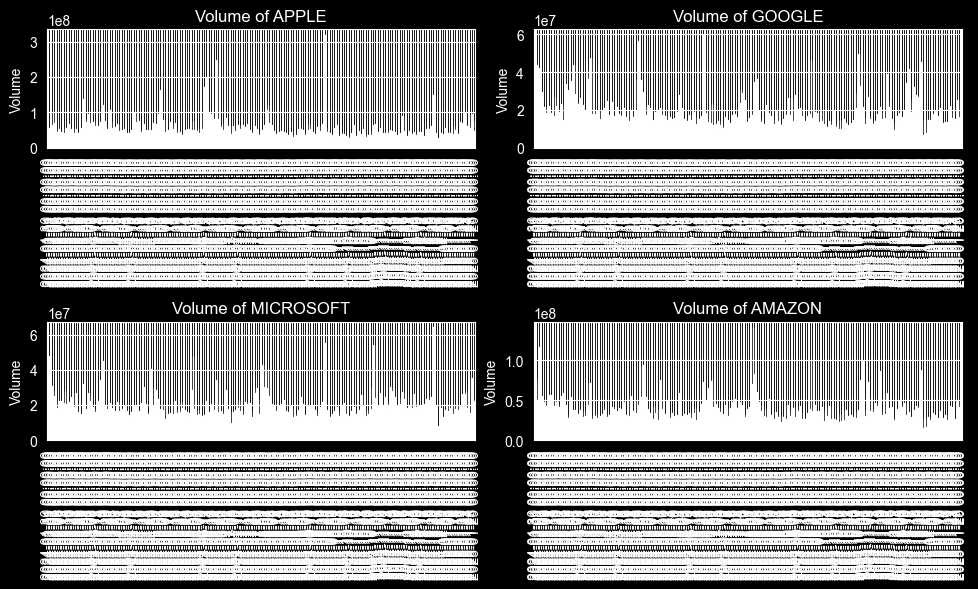

In [24]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_names, 1):
    plt.subplot(2, 2, i)  # 2x2 grid for 4 companies
    df[df['company_name'] == company]['Volume'].plot(kind='bar', figsize=(10, 6))  # Plot volume as bars
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume of {company}")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


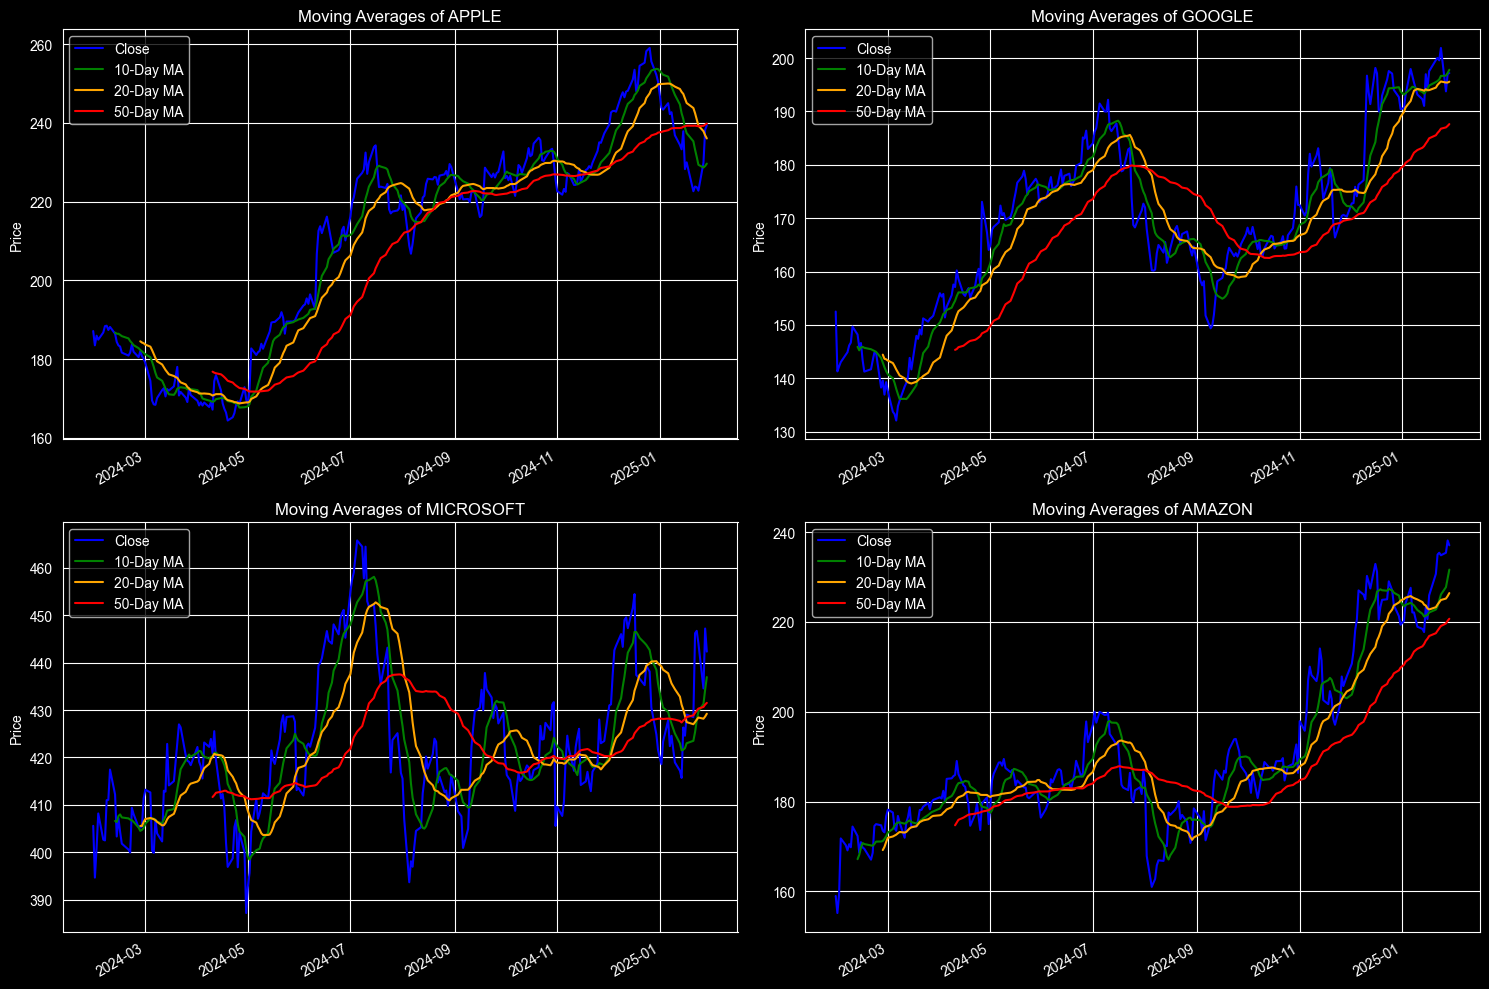

In [32]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Loop over each company
for i, company in enumerate(company_names, 1):
    plt.subplot(2, 2, i)  # 2x2 grid for 4 companies
    
    # Filter the data for the current company
    company_data = df[df['company_name'] == company]
    
    # Calculate the moving averages for the company
    company_data['MA_10'] = company_data['Close'].rolling(window=10).mean()
    company_data['MA_20'] = company_data['Close'].rolling(window=20).mean()
    company_data['MA_50'] = company_data['Close'].rolling(window=50).mean()
    
    # Plot the closing price and the moving averages
    company_data['Close'].plot(label='Close', color='blue')
    company_data['MA_10'].plot(label='10-Day MA', color='green')
    company_data['MA_20'].plot(label='20-Day MA', color='orange')
    company_data['MA_50'].plot(label='50-Day MA', color='red')
    
    # Set plot title and labels
    plt.title(f"Moving Averages of {company}")
    plt.xlabel(None)
    plt.ylabel('Price')
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


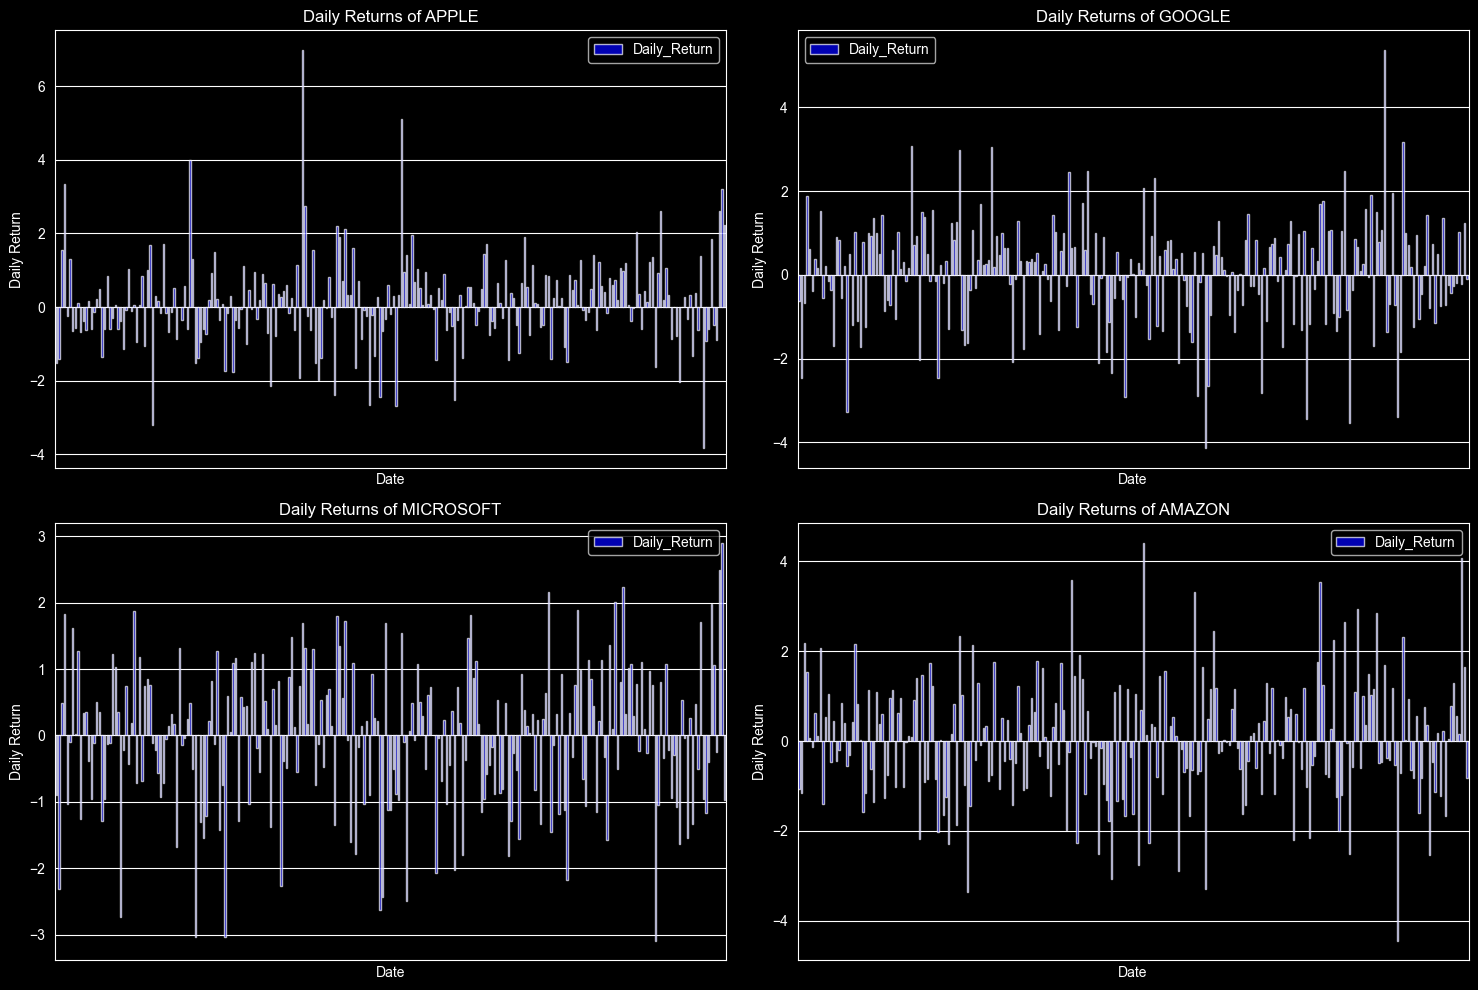

In [50]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Loop over each company to create subplots
for i, company in enumerate(company_names, 1):
    plt.subplot(2, 2, i)  # 2x2 grid for 4 companies
    
    # Filter data for the current company
    company_data = df[df['company_name'] == company].copy()
    
    # Ensure 'Date' is used correctly (whether it's an index or column)
    if 'Date' not in company_data.columns:
        company_data = company_data.reset_index()  # Reset index if 'Date' is in index
    
    # Calculate Daily Returns (DR)
    company_data['Daily_Return'] = (((company_data['Close'] - company_data['Open']) / company_data['Open'])*100)
    
    # Plot Daily Returns as a bar chart
    company_data.plot(x='Date', y='Daily_Return', kind='bar', ax=plt.gca(), color='blue', alpha=0.7)

    # Title and labels
    plt.title(f"Daily Returns of {company}")
    plt.xlabel("Date")
    plt.ylabel("Daily Return")
    plt.xticks([])  # Hide x-axis labels for readability

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [52]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

954

In [53]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.16493167],
       [0.15407693],
       [0.16141293],
       ...,
       [0.30966223],
       [0.31784319],
       [0.3146068 ]])

In [54]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.16493167, 0.15407693, 0.16141293, 0.15840096, 0.16385817,
       0.1686892 , 0.16901724, 0.16576677, 0.16806586, 0.16298983,
       0.15668957, 0.15403212, 0.15316626, 0.14853806, 0.14629868,
       0.14856801, 0.15468897, 0.14916519, 0.14510436, 0.14949359,
       0.14588065, 0.1438801 , 0.14062551, 0.12700984, 0.11214009,
       0.10915423, 0.10879592, 0.11396149, 0.11999301, 0.1214262 ,
       0.11515589, 0.12073949, 0.11960484, 0.12288929, 0.12993607,
       0.13766946, 0.11587242, 0.11858959, 0.11431984, 0.11091591,
       0.12166507, 0.11620087, 0.1118714 , 0.10831813, 0.11073676,
       0.1082585 , 0.11052774, 0.10715367, 0.11079643, 0.10515307,
       0.12683068, 0.1313394 , 0.11981381, 0.10993056, 0.10581002,
       0.10294351, 0.09685236, 0.09936047, 0.10252548, 0.10885564])]
[0.11145337473785322]

[array([0.16493167, 0.15407693, 0.16141293, 0.15840096, 0.16385817,
       0.1686892 , 0.16901724, 0.16576677, 0.16806586, 0.16298983,
       0.15668957, 0.15403212, 0.15

In [58]:
#uncomment if you don't have this package installed
#!pip install tensorflow

In [59]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

894/894 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - loss: 0.0134


In [60]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step


11.663027565062306

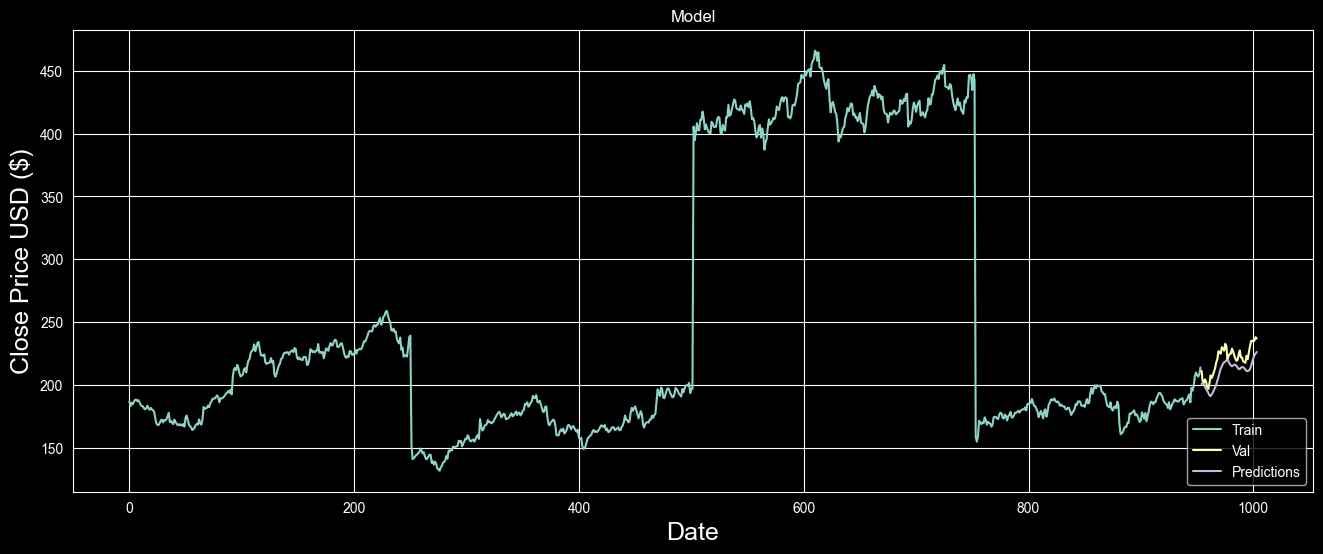

In [61]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

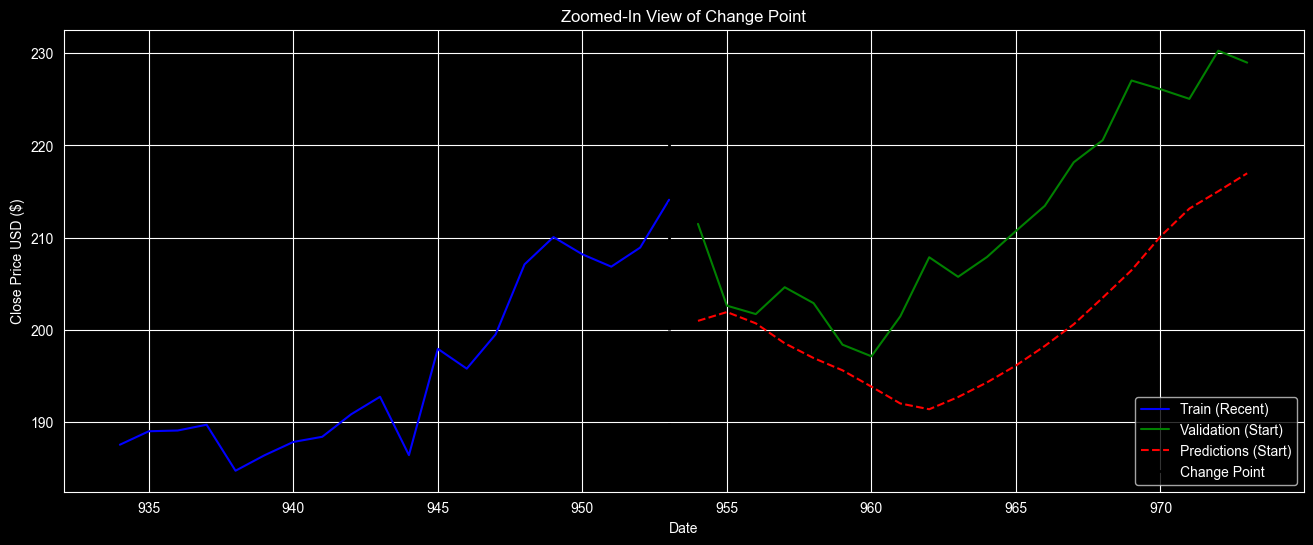

In [66]:
# Create a figure
plt.figure(figsize=(16, 6))

# Set title and labels
plt.title('Zoomed-In View of Change Point')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')

# Focus only on the last few points of training and the first few of validation
zoom_range = valid.index[:20]  # Adjust range to show only the transition area
plt.plot(train['Close'].iloc[-20:], label='Train (Recent)', color='blue')  # Last 20 train points
plt.plot(valid['Close'][:20], label='Validation (Start)', color='green')  # First 20 validation points
plt.plot(valid['Predictions'][:20], label='Predictions (Start)', linestyle='dashed', color='red')  # Predictions

# Add a vertical line at the transition point
plt.axvline(x=train.index[-1], color='black', linestyle='--', linewidth=2, label='Change Point')

# Show legend
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [62]:
# Show the valid and predicted prices
valid

,Close,Predictions
954,211.479996,200.962662
955,202.610001,201.917984
956,201.699997,200.693253
957,204.610001,198.530945
958,202.880005,196.930450
959,198.380005,195.598526
960,197.119995,193.828171
961,201.449997,192.002090
962,207.860001,191.377090
963,205.740005,192.699310
